# Random Forest Assignment
Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
candidates = pd.read_csv(r"E:\MCA\ML\ML Assignment\rf.csv")

In [3]:
candidates

,gmat,gpa,work_experience,age,admitted
0,780,4.0,3,25,2
1,750,3.9,4,28,2
2,690,3.3,3,24,1
3,710,3.7,5,27,2
4,780,3.9,4,26,2
5,730,3.7,6,31,2
6,690,2.3,1,24,0
7,720,3.3,4,25,2
8,740,3.3,5,28,2
9,690,1.7,1,23,0


In [4]:
candidates.head()

,gmat,gpa,work_experience,age,admitted
0,780,4.0,3,25,2
1,750,3.9,4,28,2
2,690,3.3,3,24,1
3,710,3.7,5,27,2
4,780,3.9,4,26,2


In [5]:
candidates.tail()

,gmat,gpa,work_experience,age,admitted
35,650,2.3,1,22,0
36,670,2.7,2,23,0
37,580,3.3,1,24,0
38,590,1.7,4,28,0
39,790,3.7,5,31,2


In [6]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             40 non-null     int64  
 1   gpa              40 non-null     float64
 2   work_experience  40 non-null     int64  
 3   age              40 non-null     int64  
 4   admitted         40 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.6 KB


In [7]:
candidates.shape

(40, 5)

In [8]:
candidates.describe()

,gmat,gpa,work_experience,age,admitted
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,661.500000,3.095000,3.425000,26.475000,0.850000
std,69.524023,0.631218,1.737778,2.571914,0.863802
min,540.000000,1.700000,1.000000,22.000000,0.000000
25%,607.500000,2.700000,2.000000,24.000000,0.000000
50%,660.000000,3.300000,4.000000,26.000000,1.000000
75%,710.000000,3.700000,5.000000,28.000000,2.000000
max,790.000000,4.000000,6.000000,31.000000,2.000000


In [9]:
#Create the DataFrame

In [10]:
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','age','admitted'])
print (df)

    gmat  gpa  work_experience  age  admitted
0    780  4.0                3   25         2
1    750  3.9                4   28         2
2    690  3.3                3   24         1
3    710  3.7                5   27         2
4    780  3.9                4   26         2
5    730  3.7                6   31         2
6    690  2.3                1   24         0
7    720  3.3                4   25         2
8    740  3.3                5   28         2
9    690  1.7                1   23         0
10   610  2.7                3   25         0
11   690  3.7                5   27         2
12   710  3.7                6   30         2
13   680  3.3                4   28         1
14   770  3.3                3   26         2
15   610  3.0                1   23         0
16   580  2.7                4   29         0
17   650  3.7                6   31         1
18   540  2.7                2   26         0
19   590  2.3                3   26         0
20   620  3.3                2   2

Apply the Random Forest

In [11]:
X = df[['gmat', 'gpa','work_experience','age']]
y = df['admitted']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [13]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [14]:
print (X_test) #test dataset (without the actual outcome)
print (y_pred) #predicted values

    gmat  gpa  work_experience  age
22   550  2.3                4   28
20   620  3.3                2   25
25   670  3.3                6   29
4    780  3.9                4   26
10   610  2.7                3   25
15   610  3.0                1   23
28   650  3.7                6   30
11   690  3.7                5   27
18   540  2.7                2   26
29   760  3.3                5   30
[0 0 1 2 0 0 1 1 0 2]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

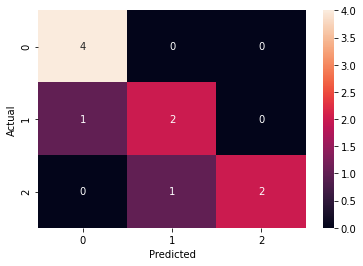

In [15]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [16]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8


Perform a Prediction

In [17]:
prediction = clf.predict([[730,3.7,4,27]]) 
print ('Predicted Result: ', prediction)

Predicted Result:  [2]


In [18]:
featureImportances = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featureImportances)

0    0.515351
1    0.277132
2    0.142704
3    0.064813
dtype: float64


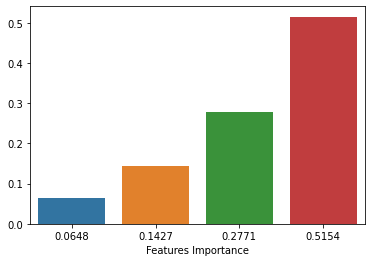

In [19]:
sn.barplot(x=round(featureImportances,4), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()